In [393]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Feature4')

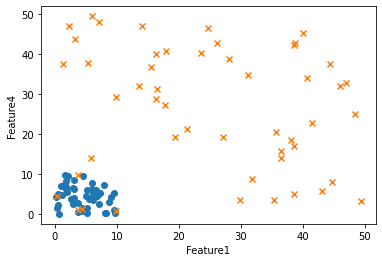

In [394]:
data = np.zeros((100,5), dtype=float)

np.random.seed(42)
data[:50,4] = 0
data[50:,4] = 1

for i in range(data.shape[1]-1):
    data[:50, i] = np.random.random((1,50))*10
    data[50:, i] = np.random.random((1,50))*50

df = pd.DataFrame(data, columns= ['Feature'+str(i) for i in range(1,5)]+['label'])
df.to_csv("DataSet.csv", index=False)

plt.scatter(df[ df['label']==0.0 ]['Feature1'], df[ df['label']==0.0 ]['Feature4'], marker='o', Label=0)
plt.scatter(df[ df['label']==1.0 ]['Feature1'], df[ df['label']==1.0 ]['Feature4'], marker='x', Label=1)
plt.xlabel('Feature1')
plt.ylabel('Feature4')

# del df

In [396]:
class Perceptron:
    def __init__(self, features, epochs=1000, learning_rate=0.01):
        self.epochs = epochs
        self.features = features
        self.learning_rate = learning_rate
        self.weights = np.zeros(features + 1)
           
    def predict(self, inputs):
        summation = self.weights[0]
        summation += sum([inputs[j]*self.weights[j+1] for j in range(self.features)])
        if summation > 0:
          stepFunction = 1
        else:
          stepFunction = 0 
        return stepFunction

    def train(self, tinputs, labels):
        for epoch in range(self.epochs):
            for inputs, label in zip(tinputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

In [409]:
def ConfusionMatrix(label, predicted):
    data = {'Actual Label': label, 'Predicted Label': predicted}
    df = pd.DataFrame(data, columns=data.keys())
    confusion_matrix = pd.crosstab(df['Actual Label'], df['Predicted Label'], rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True)

In [410]:
# reading the created RandomDataSet.csv
df = pd.read_csv('DataSet.csv')

In [411]:
data = df.to_numpy()
print(data.shape)

test = np.vstack((data[:20], data[50:70]))
train = np.vstack((data[20:50], data[70:]))

features = train[:,:-1]
labels = train[:,-1]

(100, 5)


In [412]:
p = Perceptron(features.shape[1])
p.train(features, labels)

In [413]:
predicted = list()
testLabel = list(map(int, test[:,-1]))

print("Labels\tPredicted")

for i in range(test.shape[0]):
    predicted.append(p.predict(test[i,:-1]))
    print(f'{int(test[i,-1])}\t{predicted[-1]}')

Labels	Predicted
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	0
1	1


{'TP': 19, 'TN': 20, 'FP': 0, 'FN': 1}


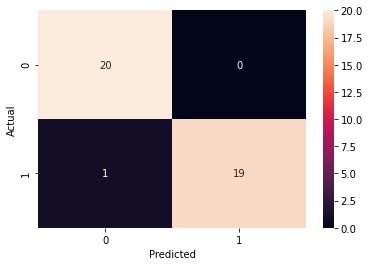

In [415]:
confusion = {'TP':0, 'TN':0, 'FP':0, 'FN':0}

for i in range(len(predicted)):
    if int(test[i,-1]) == 1 and predicted[i] == 1:
        confusion['TP']+=1
    elif int(test[i,-1]) == 1 and predicted[i] == 0:
        confusion['FN']+=1
    elif int(test[i,-1]) == 0 and predicted[i] == 1:
        confusion['FP']+=1
    else:
        confusion['TN']+=1
        
print(confusion)

ConfusionMatrix(testLabel, predicted)

In [416]:
p.predict([8,4,2,5])

0

In [417]:
# using sonar dataset
df = pd.read_csv('sonar.all-data.csv')
df.head()
df['R'] = df['R'].map({'R': 1, 'M': 0})

data = df.to_numpy()

test = np.vstack((data[:20], data[180:]))
train = data[20:180]

features = train[:,:-1]
labels = train[:,-1]

p = Perceptron(features.shape[1])
p.train(features, labels)
print("Labels\tPredicted")
predicted = list()
testLabel = list(map(int, test[:,-1]))
for i in range(test.shape[0]):
    predicted.append(p.predict(test[i,:-1]))
    print(f'{int(test[i,-1])}\t{predicted[-1]}')

Labels	Predicted
1	0
1	0
1	0
1	0
1	0
1	0
1	0
1	0
1	0
1	1
1	0
1	0
1	1
1	0
1	1
1	0
1	0
1	1
1	0
1	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	1
0	0
0	0


{'TP': 4, 'TN': 26, 'FP': 1, 'FN': 16}


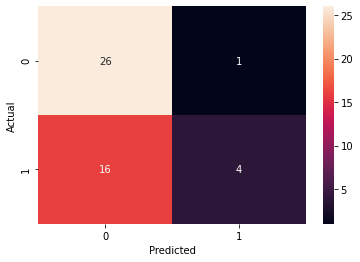

In [419]:
confusion = {'TP':0, 'TN':0, 'FP':0, 'FN':0}

for i in range(len(predicted)):
    if int(test[i,-1]) == 1 and predicted[i] == 1:
        confusion['TP']+=1
    elif int(test[i,-1]) == 1 and predicted[i] == 0:
        confusion['FN']+=1
    elif int(test[i,-1]) == 0 and predicted[i] == 1:
        confusion['FP']+=1
    else:
        confusion['TN']+=1
        
print(confusion)

ConfusionMatrix(testLabel, predicted)